# EDA on Nifty50 Stocks

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preparation and Cleaning

In [2]:
df = pd.read_csv("NIFTY50_all.csv")

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741


In [4]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
145603,2018-08-21,M&M,EQ,969.55,973.0,976.65,955.50,959.0,957.80,965.85,1557070.0,1.503896e+14,73340.0,945479.0,0.6072
145604,2018-08-23,M&M,EQ,957.80,960.0,970.00,954.30,960.0,963.10,962.20,1978510.0,1.903728e+14,81035.0,1211852.0,0.6125
145605,2018-08-24,M&M,EQ,963.10,966.2,972.40,961.15,968.0,968.30,968.39,1634893.0,1.583207e+14,51295.0,1037621.0,0.6347
145606,2018-08-27,M&M,EQ,968.30,974.3,983.90,967.80,979.5,976.45,973.76,1635797.0,1.592873e+14,62708.0,1097023.0,0.6706
145607,2018-08-28,M&M,EQ,976.45,982.0,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(145608, 15)

In [6]:
df.duplicated().sum()   #No Duplicates Found

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145608 entries, 0 to 145607
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                145608 non-null  object 
 1   Symbol              145608 non-null  object 
 2   Series              145608 non-null  object 
 3   Prev Close          145608 non-null  float64
 4   Open                145608 non-null  float64
 5   High                145608 non-null  float64
 6   Low                 145607 non-null  float64
 7   Last                145607 non-null  float64
 8   Close               145607 non-null  float64
 9   VWAP                145607 non-null  float64
 10  Volume              145607 non-null  float64
 11  Turnover            145607 non-null  float64
 12  Trades              73020 non-null   float64
 13  Deliverable Volume  134873 non-null  float64
 14  %Deliverble         134873 non-null  float64
dtypes: float64(12), object(3)
memory u

In [8]:
df.isnull().sum()

Date                      0
Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       1
Last                      1
Close                     1
VWAP                      1
Volume                    1
Turnover                  1
Trades                72588
Deliverable Volume    10735
%Deliverble           10735
dtype: int64

In [9]:
# We don't Need Trades column and its half values are null
del df["Trades"]

####  DataType Change

In [10]:
df["Date"] =pd.to_datetime(df.Date)   

In [11]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366.0,2.687719e+15,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338.0,4.312765e+14,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121.0,4.550658e+14,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762.0,4.283257e+14,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470.0,2.875200e+14,816123.0,0.2741


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145608 entries, 0 to 145607
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                145608 non-null  datetime64[ns]
 1   Symbol              145608 non-null  object        
 2   Series              145608 non-null  object        
 3   Prev Close          145608 non-null  float64       
 4   Open                145608 non-null  float64       
 5   High                145608 non-null  float64       
 6   Low                 145607 non-null  float64       
 7   Last                145607 non-null  float64       
 8   Close               145607 non-null  float64       
 9   VWAP                145607 non-null  float64       
 10  Volume              145607 non-null  float64       
 11  Turnover            145607 non-null  float64       
 12  Deliverable Volume  134873 non-null  float64       
 13  %Deliverble         134873 no

### Heatmap to show correlation between all variables

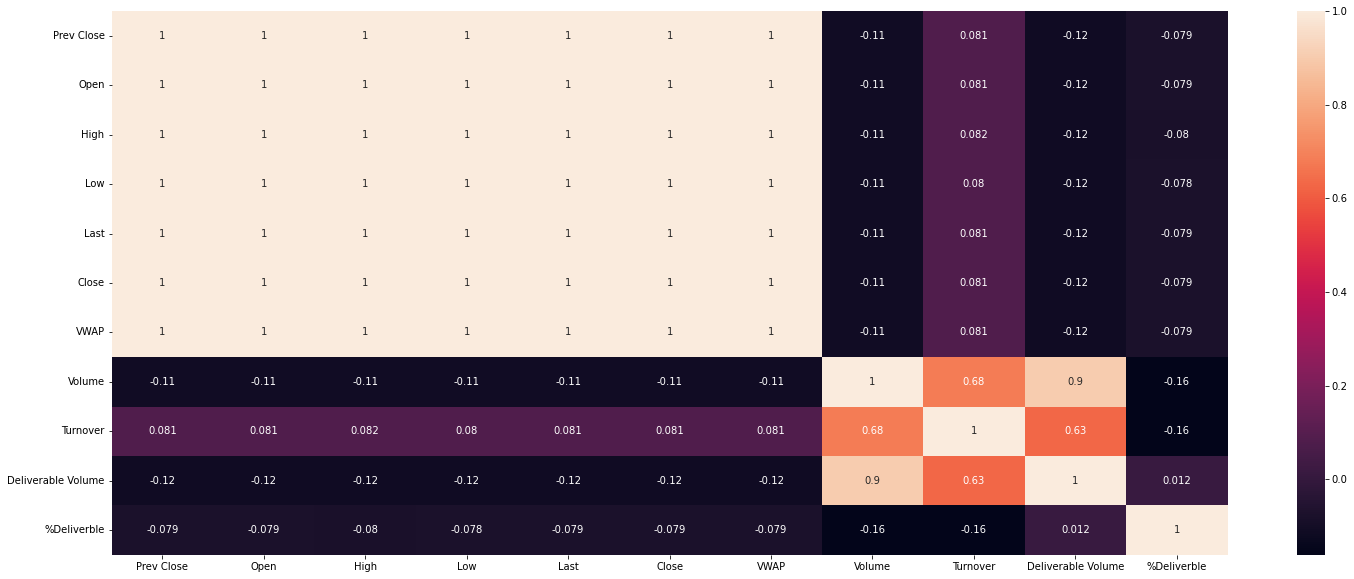

In [13]:
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(), annot = True);

<li>A positive corelation shows both variables moves in same direction
<li>A negative corelation shows both variables moves in opposite direction
<li>Zero corelation means there is no relation at all


### Average Volume Of Stocks

In [14]:
df.sort_values("Volume" , ascending = False , inplace = True)

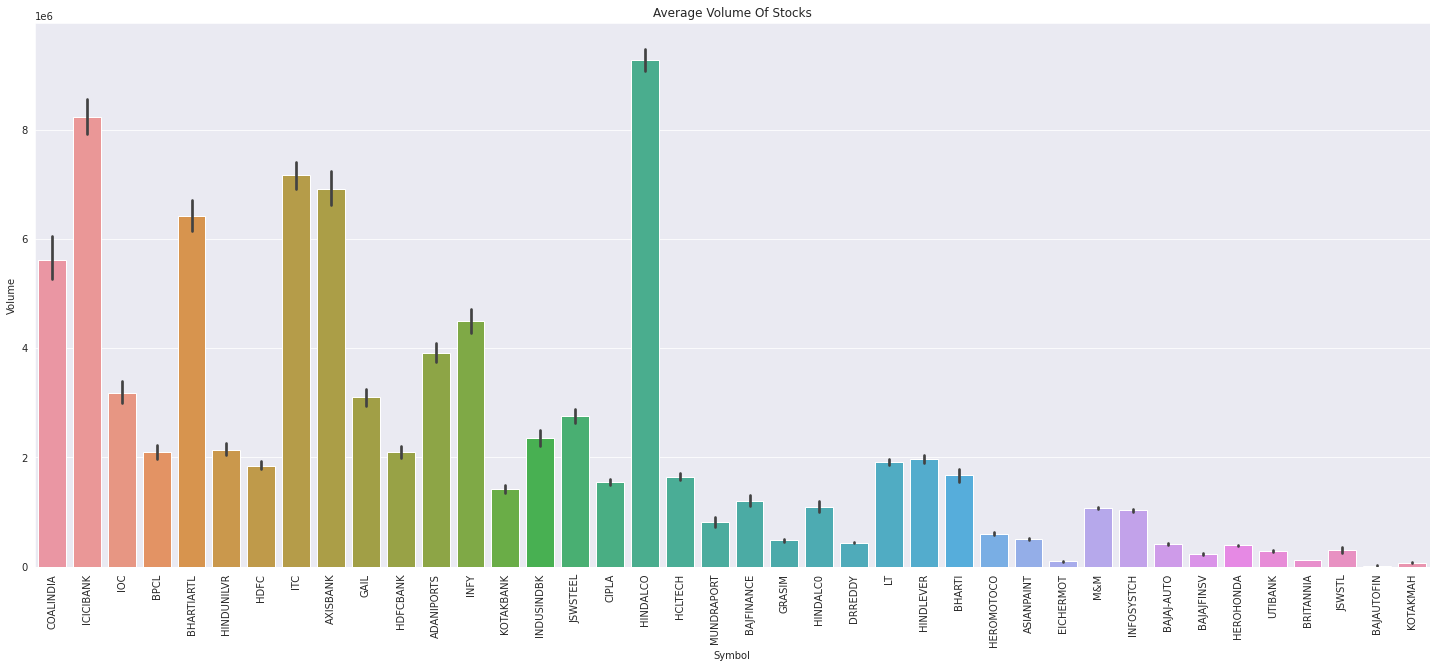

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize = (25,10))
plt.title('Average Volume Of Stocks')
plt.xticks(rotation=90)
sns.barplot(x = "Symbol",y = "Volume" ,data = df);

<ul>
<li> IN above bar chart We can see average volume of stocks with their volume volatility.
<li> More the volume it means more people are trading in that stock.
<li> High volume stocks are good for intraday trading. 
 <li>   High volume indicates more interest in the stock and the presence of buyers and sellers in that stock. When the stock is in an uptrend, and there is an increase in volume along with the ongoing uptrend, the stocks will continue to go up. It indicates that more and more buyers are interested in buying that stock. <ul>

### All time high of stocks

In [16]:
maxprice = df.groupby(["Symbol"])["High"].max().reset_index()


In [17]:
maxprice = pd.DataFrame(maxprice)

In [18]:
type(maxprice)

pandas.core.frame.DataFrame

In [19]:
maxprice.rename(columns = {"High":"All Time High"} , inplace = True)

In [20]:
maxprice.columns

Index(['Symbol', 'All Time High'], dtype='object')

In [21]:
maxprice.sort_values("All Time High" , ascending = False , inplace = True)

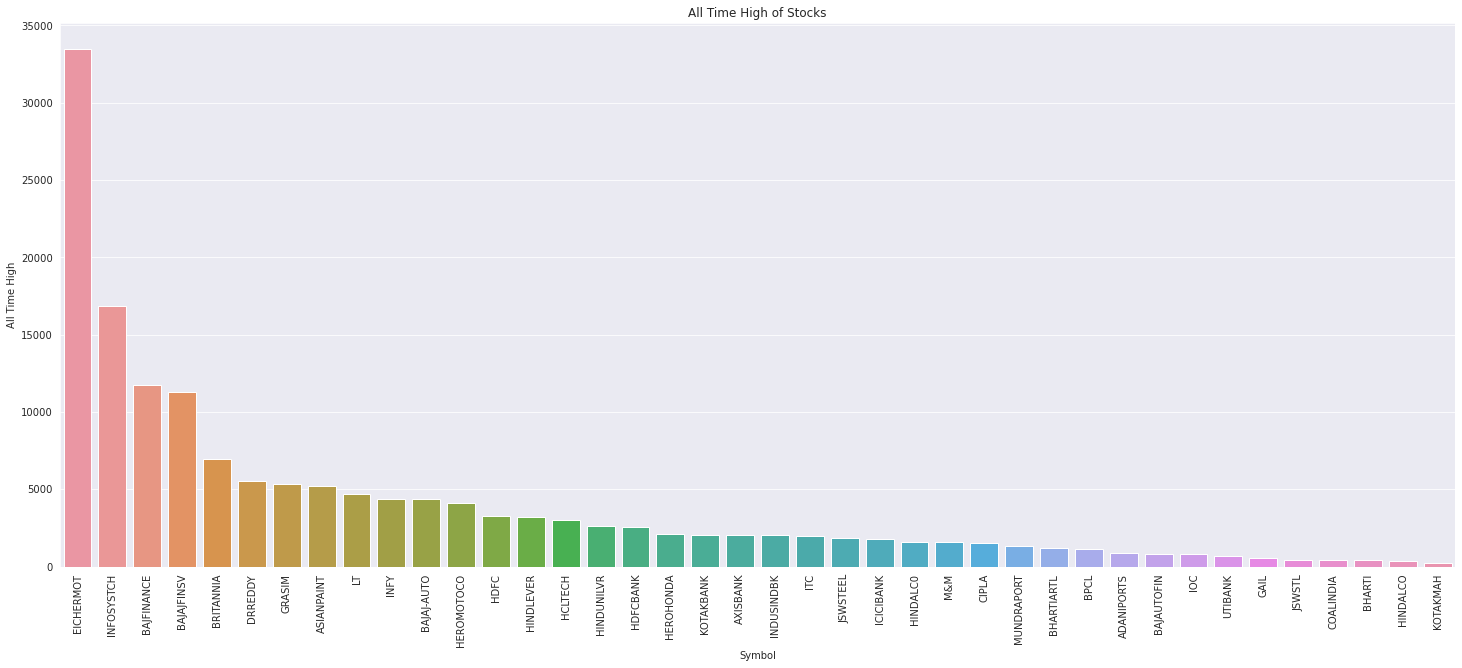

In [22]:
sns.set_style("darkgrid")
plt.figure(figsize = (25,10))
plt.title('All Time High of Stocks')
plt.xticks(rotation=90)
sns.barplot(x = "Symbol",y = "All Time High" ,data = maxprice);


   
 <li> The highest price at which the stock was traded is known as all time high.
 <li> Here we can see the highest traded price (till the data available ) of Eicher Motors is near 340000 .


### Most volatile Stocks

<li>Stock volatility is the frequency and magnitude of price movements, up or down. The bigger and more frequent the price swings, the more volatile the Stock is said to be.
<li>Volatility of a stock is the percentage difference between the low price and high price of a stock for the day.

In [23]:
df["price volatility"] = df["High"]-df['Low']
df["price volatility percent"] = round((df["price volatility"]/df["Open"])*100,2)


In [24]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,price volatility,price volatility percent
46263,2010-11-04,COALINDIA,EQ,245.00,291.0,344.90,291.00,342.00,342.55,327.29,479716245.0,1.570040e+16,187584905.0,0.3910,53.90,18.52
106538,2019-11-26,ICICIBANK,EQ,497.80,501.8,517.55,501.00,513.00,510.70,509.65,286857658.0,1.461959e+16,232530747.0,0.8106,16.55,3.30
122176,2020-01-23,IOC,EQ,113.65,115.1,120.90,115.05,120.30,118.35,118.42,209929135.0,2.485999e+15,139345365.0,0.6638,5.85,5.08
35618,2021-03-09,BPCL,EQ,466.70,446.2,454.00,437.35,445.45,445.90,440.96,199790953.0,8.810053e+15,135572090.0,0.6786,16.65,3.73
30305,2021-02-26,BHARTIARTL,EQ,579.15,574.5,585.95,551.75,553.70,556.30,559.68,194887984.0,1.090756e+16,119239949.0,0.6118,34.20,5.95


Removing percentage volatility which is more than 40%

In [25]:
df[df["price volatility percent"]>40]

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,price volatility,price volatility percent
111602,2020-03-18,INDUSINDBK,EQ,604.15,629.00,638.85,374.80,459.20,460.80,490.24,74868388.0,3.670341e+15,15164197.0,0.2025,264.05,41.98
111608,2020-03-26,INDUSINDBK,EQ,301.30,316.35,451.95,311.65,440.00,435.90,414.30,42326744.0,1.753607e+15,10066611.0,0.2378,140.30,44.35
136777,2004-06-23,LT,EQ,2.00,500.00,745.00,150.00,638.00,635.95,627.71,2699293.0,1.694372e+14,395612.0,0.1466,595.00,119.00
128699,2008-10-31,JSWSTEEL,EQ,229.60,234.70,339.00,231.00,315.00,307.00,276.92,1548724.0,4.288720e+13,668437.0,0.4316,108.00,46.02
102692,2004-05-27,ICICIBANK,EQ,262.50,211.55,304.95,211.55,262.95,264.95,266.08,1165029.0,3.099879e+13,356472.0,0.3060,93.40,44.15
117710,2002-02-06,IOC,EQ,178.70,150.00,214.45,150.00,214.45,211.70,208.39,1079925.0,2.250489e+13,206931.0,0.1916,64.45,42.97
20850,2002-05-02,BAJAUTOFIN,EQ,53.20,45.00,63.85,42.60,63.85,62.80,60.75,47456.0,2.883009e+11,38320.0,0.8075,21.25,47.22


In [26]:
df.drop(df[df["price volatility percent"]>40].index, inplace = True)

In [27]:
volatile = pd.DataFrame(df.groupby(["Symbol"])["price volatility percent"].mean()).reset_index()

In [28]:
volatile.head()

,Symbol,price volatility percent
0,ADANIPORTS,3.518843
1,ASIANPAINT,2.918014
2,AXISBANK,3.547292
3,BAJAJ-AUTO,2.980853
4,BAJAJFINSV,3.747416


In [29]:
volatile.sort_values("price volatility percent",ascending = False, inplace = True)

In [30]:
top5volt = volatile.head(5)

In [31]:
top5volt

,Symbol,price volatility percent
35,KOTAKMAH,5.733088
39,UTIBANK,5.006559
38,MUNDRAPORT,4.963666
5,BAJAUTOFIN,4.894782
7,BHARTI,4.555014


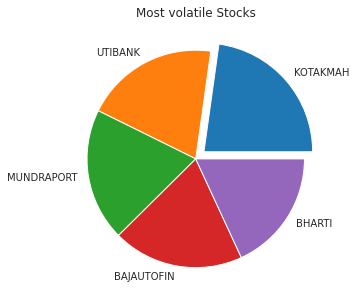

In [32]:
plt.figure(figsize = (12,5))
plt.pie(top5volt["price volatility percent"], labels = top5volt["Symbol"] ,explode = [0.1,0,0,0,0])
plt.title("Most volatile Stocks");

Here we can see kotak mahindra is the most volatile stock in these years with the average volatility of 5.73% followed by ZEETELE and UTIBANK.
Higher the volatility of a stock is, the riskier the security will be. Volatile stocks are stocks that are simply considered to be highly risky and fluctuate in value more than other investments.

Extracting year , month ,day from date

In [33]:
df["year"] = pd.DatetimeIndex(df.Date).year

In [34]:
df["month"] = pd.DatetimeIndex(df.Date).month
df["day"] = pd.DatetimeIndex(df.Date).day


In [35]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,price volatility,price volatility percent,year,month,day
46263,2010-11-04,COALINDIA,EQ,245.00,291.0,344.90,291.00,342.00,342.55,327.29,479716245.0,1.570040e+16,187584905.0,0.3910,53.90,18.52,2010,11,4
106538,2019-11-26,ICICIBANK,EQ,497.80,501.8,517.55,501.00,513.00,510.70,509.65,286857658.0,1.461959e+16,232530747.0,0.8106,16.55,3.30,2019,11,26
122176,2020-01-23,IOC,EQ,113.65,115.1,120.90,115.05,120.30,118.35,118.42,209929135.0,2.485999e+15,139345365.0,0.6638,5.85,5.08,2020,1,23
35618,2021-03-09,BPCL,EQ,466.70,446.2,454.00,437.35,445.45,445.90,440.96,199790953.0,8.810053e+15,135572090.0,0.6786,16.65,3.73,2021,3,9
30305,2021-02-26,BHARTIARTL,EQ,579.15,574.5,585.95,551.75,553.70,556.30,559.68,194887984.0,1.090756e+16,119239949.0,0.6118,34.20,5.95,2021,2,26


### what is coal India doing ?

In [36]:
dfCOAL = df[df["Symbol"]=="COALINDIA"]

In [37]:
dfCOAL.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,price volatility,price volatility percent,year,month,day
46263,2010-11-04,COALINDIA,EQ,245.0,291.00,344.90,291.00,342.0,342.55,327.29,479716245.0,1.570040e+16,187584905.0,0.3910,53.90,18.52,2010,11,4
48820,2021-02-26,COALINDIA,EQ,156.1,156.15,163.00,150.50,151.8,152.20,155.14,94115857.0,1.460159e+15,14256510.0,0.1515,12.50,8.01,2021,2,26
48819,2021-02-25,COALINDIA,EQ,144.4,146.90,157.70,145.75,156.9,156.10,152.65,85580477.0,1.306413e+15,16751013.0,0.1957,11.95,8.13,2021,2,25
48357,2019-04-16,COALINDIA,EQ,250.0,252.00,256.70,248.05,250.0,251.60,251.72,71315879.0,1.795136e+15,50842905.0,0.7129,8.65,3.43,2019,4,16
46273,2010-11-19,COALINDIA,EQ,326.9,330.25,339.95,328.10,329.0,333.55,335.77,51723739.0,1.736720e+15,29007804.0,0.5608,11.85,3.59,2010,11,19


In [38]:
df3 = dfCOAL.groupby("year")["Close"].mean().reset_index()

In [39]:
df3

,year,Close
0,2010,320.208750
1,2011,349.691296
2,2012,344.276494
3,2013,302.403600
4,2014,332.969672
5,2015,367.444960
6,2016,310.429757
7,2017,276.913911
8,2018,277.160772
9,2019,221.379184


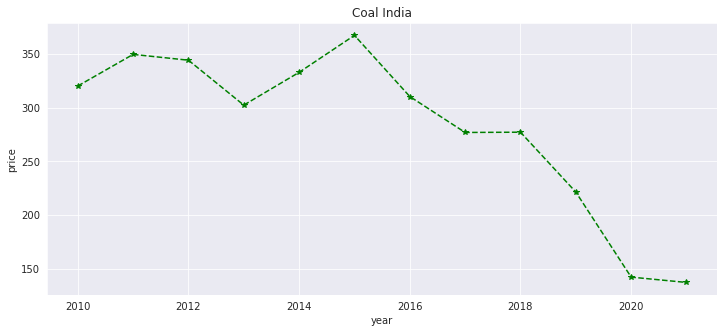

In [40]:
plt.figure(figsize = (12,5))
plt.plot(df3["year"],df3["Close"] , "--g*")
plt.title("Coal India")
plt.xlabel("year")
plt.ylabel("price");


here we can see coal india is going in downtrend from the year 2015 but it has become constant from the year 2020.

### Stocks which have given max return in 2021 

In [41]:
df2021 = df[df["year"]==2021]

In [42]:
df2021.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,price volatility,price volatility percent,year,month,day
35618,2021-03-09,BPCL,EQ,466.70,446.20,454.00,437.35,445.45,445.90,440.96,199790953.0,8.810053e+15,135572090.0,0.6786,16.65,3.73,2021,3,9
30305,2021-02-26,BHARTIARTL,EQ,579.15,574.50,585.95,551.75,553.70,556.30,559.68,194887984.0,1.090756e+16,119239949.0,0.6118,34.20,5.95,2021,2,26
127771,2021-03-19,ITC,EQ,217.65,219.00,226.15,215.55,222.80,222.95,221.92,134184994.0,2.977770e+15,65288056.0,0.4866,10.60,4.84,2021,3,19
127742,2021-02-05,ITC,EQ,229.95,232.15,238.85,227.25,233.75,234.35,233.77,125490301.0,2.933635e+15,30643189.0,0.2442,11.60,5.00,2021,2,5
64406,2021-02-18,GAIL,EQ,134.40,138.95,147.80,138.00,143.95,143.10,143.71,114715328.0,1.648602e+15,21677048.0,0.1890,9.80,7.05,2021,2,18


In [43]:
df2021.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,price volatility,price volatility percent,year,month,day
count,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2320.000000,2.320000e+03,2.320000e+03,2.320000e+03,2320.000000,2320.000000,2320.000000,2320.0,2320.000000,2320.000000
mean,1881.282392,1884.729397,1911.635905,1856.285129,1882.764138,1882.607888,1884.053793,1.021733e+07,7.231666e+14,3.471668e+06,0.349229,55.350776,3.033823,2021.0,2.487500,15.137500
std,2020.451937,2023.054355,2055.259193,1993.739683,2023.644484,2023.810569,2024.641531,1.398569e+07,6.783165e+14,5.835255e+06,0.137596,74.620477,1.457209,0.0,1.106965,8.674735
min,87.000000,87.200000,88.300000,86.750000,87.200000,87.000000,87.520000,2.446320e+05,5.077023e+13,2.972600e+04,0.043100,0.550000,0.580000,2021.0,1.000000,1.000000
25%,527.425000,528.950000,535.000000,521.537500,528.162500,527.987500,527.915000,1.910410e+06,3.012135e+14,5.705610e+05,0.241975,14.600000,2.050000,2021.0,1.750000,8.000000
50%,1246.975000,1256.025000,1270.000000,1231.125000,1253.850000,1251.750000,1250.460000,5.582648e+06,5.216881e+14,1.853698e+06,0.342400,31.725000,2.710000,2021.0,2.500000,15.000000
75%,2602.712500,2610.025000,2648.775000,2571.425000,2602.562500,2602.225000,2607.400000,1.395716e+07,9.522095e+14,4.389024e+06,0.448725,67.200000,3.670000,2021.0,3.000000,22.250000
max,11176.550000,11000.000000,11300.000000,10868.700000,11175.450000,11176.550000,11081.780000,1.997910e+08,1.090756e+16,1.355721e+08,0.781900,1200.900000,14.600000,2021.0,4.000000,31.000000


In [44]:
df2021start = df2021[(df2021["month"]==1) & (df2021["day"]==1)]

In [45]:
pricestart = df2021start[["Symbol","Open"]]

In [46]:
pricestart.head()

,Symbol,Open
127718,ITC,209.90
106815,ICICIBANK,535.55
30266,BHARTIARTL,512.25
64373,GAIL,123.90
3242,ADANIPORTS,485.00


In [47]:
df2021end = df2021[(df2021["month"]==4) & (df2021["day"]==1) ]

In [48]:
pricend = df2021end[["Symbol","Close"]]

In [49]:
pricend.head()

,Symbol,Close
131773,JSWSTEEL,508.75
127779,ITC,220.05
96264,HINDALCO,350.25
64434,GAIL,140.15
85652,HDFCBANK,1486.75


In [50]:
return1 = pricestart.merge(pricend, on = "Symbol")

In [51]:
return1.head()

,Symbol,Open,Close
0,ITC,209.90,220.05
1,ICICIBANK,535.55,594.40
2,BHARTIARTL,512.25,520.80
3,GAIL,123.90,140.15
4,ADANIPORTS,485.00,736.25


In [52]:
return1["return_percent"]= round(((return1["Close"]-return1["Open"])/ return1["Open"])*100,2)

In [53]:
return1.head()

,Symbol,Open,Close,return_percent
0,ITC,209.90,220.05,4.84
1,ICICIBANK,535.55,594.40,10.99
2,BHARTIARTL,512.25,520.80,1.67
3,GAIL,123.90,140.15,13.12
4,ADANIPORTS,485.00,736.25,51.80


In [54]:
return1.sort_values("return_percent" , ascending = False , inplace = True)

In [55]:
topreturn = return1.head(5)

In [56]:
topreturn

,Symbol,Open,Close,return_percent
20,GRASIM,924.50,1454.50,57.33
4,ADANIPORTS,485.00,736.25,51.80
8,HINDALCO,239.00,350.25,46.55
10,JSWSTEEL,387.25,508.75,31.38
7,AXISBANK,620.25,713.00,14.95


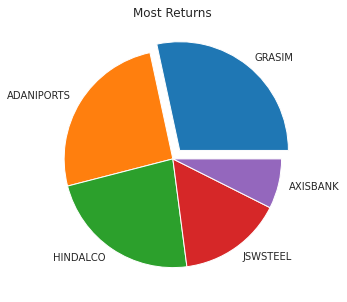

In [57]:
plt.figure(figsize = (12,5))
plt.pie(topreturn["return_percent"], labels = topreturn["Symbol"] ,explode = [0.1,0,0,0,0])
plt.title("Most Returns");

Here we can see TATAMOTORS has given maximun returns 66.40% in the year 2021 followed by GRASIM and ADANIPORTS

### Does  a high volatile stock have high volume also?

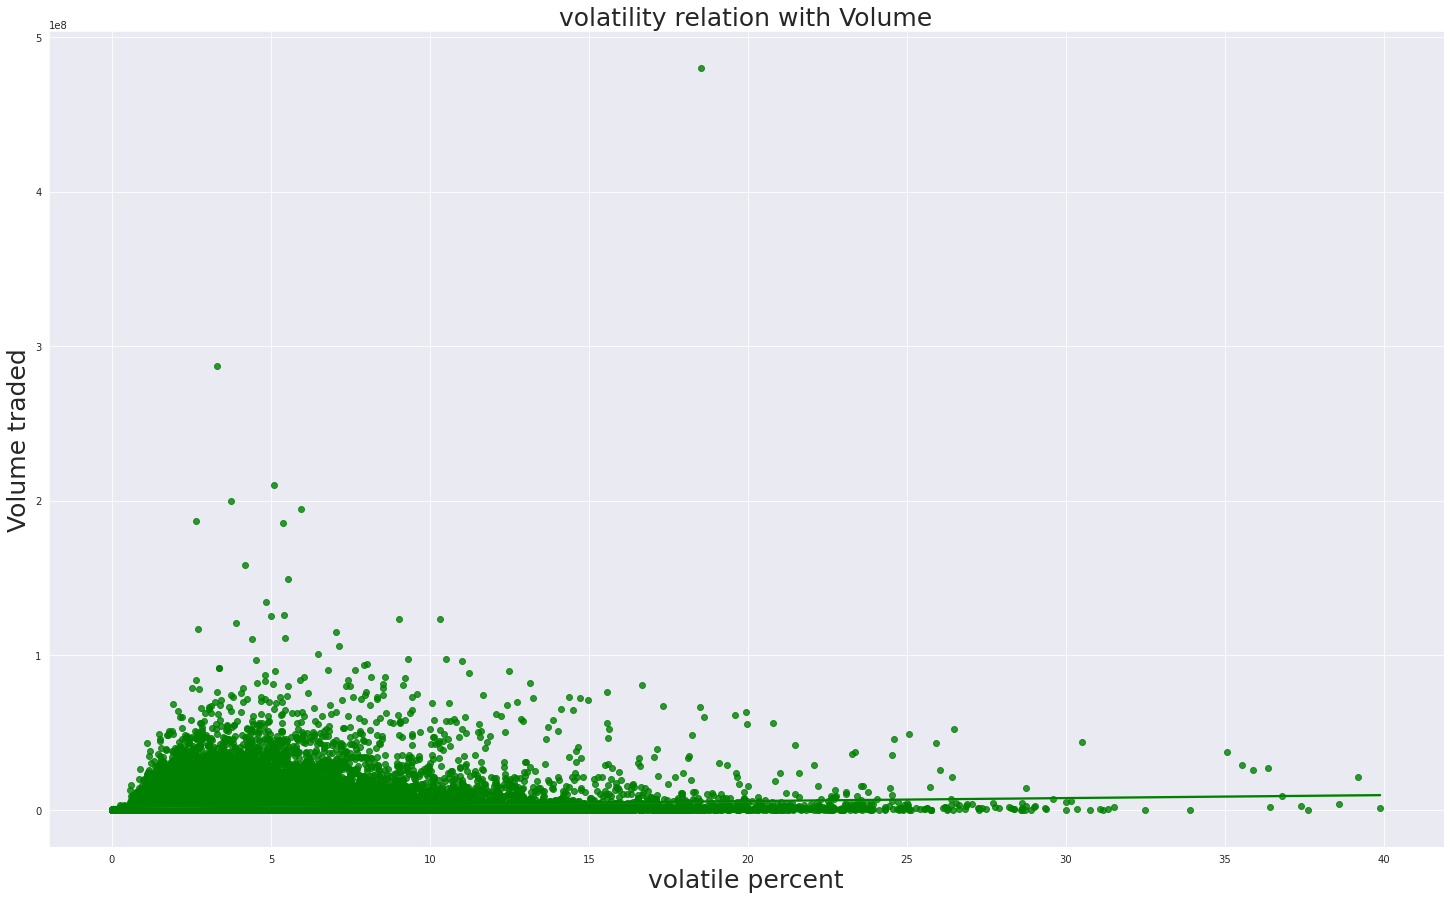

In [58]:
plt.figure(figsize = (25,15))
sns.regplot(x = df["price volatility percent"],y= df["Volume"] ,color = "Green")
plt.title("volatility relation with Volume" , fontsize = 25)
plt.xlabel("volatile percent",fontsize = 25)
plt.ylabel("Volume traded",fontsize = 25);

CLearly volume traded is independent of price volatility

### Volatility Range

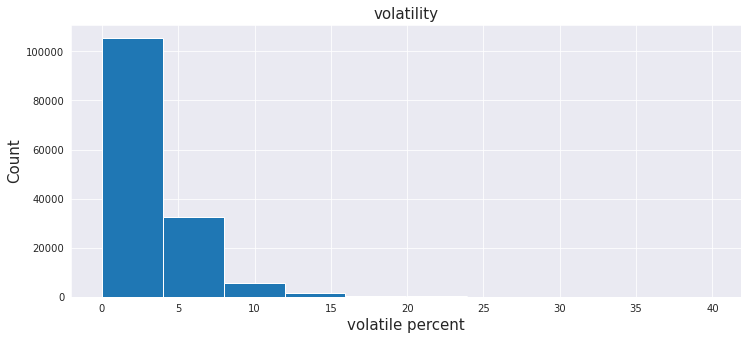

In [59]:
plt.figure(figsize = (12,5))
plt.hist(df["price volatility percent"])
plt.title("volatility" , fontsize = 15)
plt.xlabel("volatile percent",fontsize = 15)
plt.ylabel("Count",fontsize = 15);

<li> Market volatility is the frequency and magnitude of price movements, up or down. The bigger and more frequent the price swings, the more volatile the market is said to be.
<li>As we can see most of the times volatility is between 0 to 5%.The number of times when volatility  is above 10% is very less.

## Conclusion

We've drawn many inferences from the survey. Here's a summary of a few of them:
- It is nifty50 data from the year 2000 to 2021
- As we know Nifty 50 gets shuffled two times in a year, in March and in July. Reshuffle news comes out before months and sometimes i Nifty 50 is primarily a benchmark index on the National Stock Exchange of India Ltd. (NSE) that shows the weighted average of India's top 50 companies.So there is a data of 68  companies.
- KOTAKMAH,	ZEETELE	,UTIBANK,	SESAGOA	,MUNDRAPORT are the stocks which have given max return in 2021
- If a stock has high volume it always doesn't mean that it has high volatility as well.
- Most of the times volatility is 0 to 5 %. 


## Data Reference

#### keggle Dataset link -
https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data

 ### Ideas for future works


<li> We can download file that contain sectors of companies to visualise all sectors of nifty 50.
<li> We can also work on the data to see pandemic effects on the stock market of india
